## 『本次練習內容』
#### 學習如何運用NMS來過濾預測框

## 『本次練習目的』
  #### 了解NMS是如何運作的
  #### 了解為什麼需要NMS來完成最終輸出結果

##### source:https://github.com/amusi/Non-Maximum-Suppression

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:


def nms(bounding_boxes, confidence_score, threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return [], []

   
    boxes = np.array(bounding_boxes)

    '''取出每一個BOX的 x1,y1,x2,y2'''
    start_x = boxes[:, 0]
    start_y = boxes[:, 1]
    end_x = boxes[:, 2]
    end_y = boxes[:, 3]

    # Confidence scores of bounding boxes
    score = np.array(confidence_score)

    '''預設list用來保存BBOX'''
    picked_boxes = []
    picked_score = []

    '''計算每一個BOX的面積'''
    areas = (end_x - start_x + 1) * (end_y - start_y + 1)
    '''排列BOX分數'''
    order = np.argsort(score)
#     print(order)

    # Iterate bounding boxes
    while order.size > 1:
        # The index of largest confidence score
        '''當前confidence最大的預測框'''
        index = order[-1]

        # Pick the bounding box with largest confidence score
        '''保存這個BBOX'''
        picked_boxes.append(bounding_boxes[index])
        picked_score.append(confidence_score[index])

        # Compute ordinates of intersection-over-union(IOU)
        '''計算Boxes與最高分BOX之間的IOU'''
#         x1 = np.maximum(start_x[index], start_x[order[:-1]])
#         x2 = np.minimum(end_x[index], end_x[order[:-1]])
#         y1 = np.maximum(start_y[index], start_y[order[:-1]])
#         y2 = np.minimum(end_y[index], end_y[order[:-1]])

        x1 = np.maximum(start_x[order], start_x[index])
        y1 = np.maximum(start_y[order], start_y[index])    
        x2 = np.minimum(end_x[order], end_x[index])
        y2 = np.minimum(end_y[order], end_y[index])
        
        
        # Compute areas of intersection-over-union
#         w = np.maximum(0.0, x2 - x1 + 1)
#         h = np.maximum(0.0, y2 - y1 + 1)
#         intersection = w * h
        intersection = (x2-x1)*(y2-y1)
        areas = (end_x[order]-start_x[order]) * (end_y[order]-start_y[order])

        '''計算IOU'''
#         ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)
        ratio = intersection / (areas + areas[-1] - intersection)

        '''重疊率小於預測threshold的Boxes要保存下來'''
        left = np.where(ratio<threshold)
        order = order[left]
    return picked_boxes, picked_score




## 參數設置

In [59]:
# Image name
image_name = 'nms.jpg'

# Bounding boxes
bounding_boxes = [(200, 82, 350, 317), (180, 67, 305, 282), (200, 90, 368, 304), (170, 60, 280, 270)]
confidence_score = [0.9, 0.75, 0.8, 0.7]

# Read image
image = cv2.imread(image_name)

# Copy image as original
org = image.copy()

# Draw parameters
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2

'''IoU threshold :重疊超過多少就過濾掉'''
threshold = 0.5


## 經過NMS之前

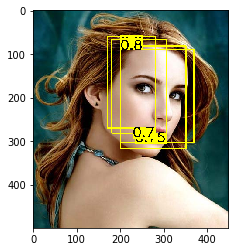

In [60]:
# Draw bounding boxes and confidence score

for i, ((start_x, start_y, end_x, end_y), confidence) in enumerate(zip(bounding_boxes, confidence_score)):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle(org, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)

    if (i%2==0):                
        cv2.rectangle(org, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
        cv2.putText(org, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)
    else:
        cv2.rectangle(org, (end_x-w, end_y), (end_x, end_y + (2 * baseline + 5)), (0, 255, 255), -1)
        cv2.putText(org, str(confidence), (end_x-w, end_y+baseline*2 ), font, font_scale, (0, 0, 0), thickness)        
        
# Show image
plt.imshow(org[:,:,::-1])
plt.show()


## 經過NMS之後

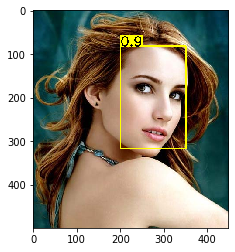

In [61]:
# Run non-max suppression algorithm
picked_boxes, picked_score = nms(bounding_boxes, confidence_score, threshold)

# Draw bounding boxes and confidence score after non-maximum supression
for (start_x, start_y, end_x, end_y), confidence in zip(picked_boxes, picked_score):
    (w, h), baseline = cv2.getTextSize(str(confidence), font, font_scale, thickness)
    cv2.rectangle(image, (start_x, start_y - (2 * baseline + 5)), (start_x + w, start_y), (0, 255, 255), -1)
    cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 255, 255), 2)
    cv2.putText(image, str(confidence), (start_x, start_y), font, font_scale, (0, 0, 0), thickness)

plt.imshow(image[:,:,::-1])
plt.show()

## 比較

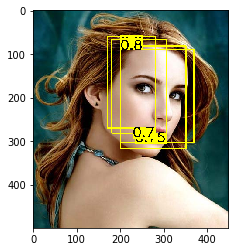

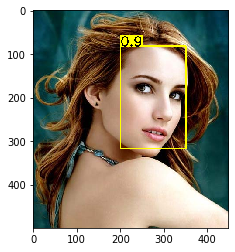

In [62]:
# Show image
plt.imshow(org[:,:,::-1])
plt.show()
plt.imshow(image[:,:,::-1])
plt.show()